<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Alumno1;rol;malla</h3>
    <h3 align="center">Alumno2;rol;malla</h3>
    <h3 align="center">Mayo 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**

## Tips V.2

A la hora de trabajar con números o procesos aleatorios a veces es importante poder replicar lo que usted realiza (pensando en un trabajo que se mostrará a la comunidad científica), para esto se tiene que, para generar la misma secuencia de números aleatorios, se debe pasar una *semilla* al generador de éstos. 

**R**
```R
set.seed(numero)
```

**Python**
```python
numpy.random.seed(numero) #libreria numpy 
random.seed(numero) #libreria random
#O de otra libreria que pueda utilizar para generar números aleatorios
```

Si desea puede aplicar esto en su laboratorio para que se pueda reproducir exactamente lo mismo que usted obtuvo.

In [ ]:
## Ejemplo R 

print("Obteniendo el mismo número siempre")
for(i in 1:10){
    set.seed(1) #Esto hará que saquemos el mismo número una y otra vez 
    resultado = sample(c(1:1000),1) #Sacaremos 1 número entre 1 y 1000
    print(resultado)
}

print("Obteniendo la misma secuencia ") #Correr múltiples veces para ver esto 
set.seed(1)
for(i in 1:10){
    resultado = sample(c(1:1000),1)
    print(resultado) #Aquí se obtiene la misma secuencia 
}

In [ ]:
## Ejemplo Python 
import random 

print("Obteniendo el mismo número siempre")
for i in range(10):
    random.seed(1)
    resultado = random.randint(1,1000)
    print(resultado)

print("Obteniendo la mismas secuencia ") #Correr múltiples veces para ver esto 
random.seed(1)
for i in range(10):
    resultado = random.randint(1,1000)
    print(resultado)

## 1. LDA (40p)

Es de mucho interés hoy en día el hecho de poder construir un clasificador que pueda inferir reglas a partir de los datos para poder predecir a futuro, en esta sección trabajará con una versión simplificada del dataset del titanic (data_titanic.csv), la que contiene 3 columnas:

* Age: la edad del pasajero
* Fare: el precio del boleto
* Survived: si sobrevivió a la tragedia o no

(Si, estamos en el ámbito multivariado ahora)

El clasificador, en breves palabras, intenta maximizar $P(Y=survived|X=age,fare)$ asumiendo que los datos ($X$) provienen de una distribución Gaussiana Multivariada. Se espera que usted sea capaz de obtener los máximos verosímiles de los parámetros de esta distribución para poder construir su clasificador **a mano**.

>a) Construya un clasificador LDA que permita distinguir si un pasajero sobrevive o no dado su edad y precio del ticket. *Recomendación: Puede separar una cantidad pequeña de datos para utilizarlos para probar su clasificador, es muy importante que si hace esto, estos datos no sean utilizados en la construcción del clasificador* 

Cualquier uso de las funciones provistas por los lenguajes que implementen LDA implica puntaje 0 en esta sección **sin excepción**.

Esta pregunta es un poco extensa por lo que se recomienda leer bien el material provisto (mas abajo) y los libros guías del curso. No es necesario que responda todo de una, puede ir por partes, es más, esto es recomendable porque así puede ir ganando puntaje y no jugarse todo en un "funciona/no funciona" recuerde explicar bien su razonamiento.

Si se complica mucho intente el caso univariado primero (fare vs survived ó age vs survived), si solamente presenta el univariado podrá optar a solamente 10 puntos del total (siempre y cuando esté bien).

Material que podría resultar útil:
* [Video](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Articulo LDA](https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5)
* [Explicacion matematica de sklearn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
* Libros Guía indicados en el Syllabus(verosimilitud)


### Desarrollo

En primer lugar, se busca el valor de la máxima verosimilitud de los parámetros de la distribución, en este caso normal. Para esto se utiliza la función de verosimilitud en la distribución, que consiste en el producto de todos los valores que toma.

<br>
    <center>
    $\frac{1}{(2\pi\sigma^2)^\frac{1}{2}}exp\bigg(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2\bigg) 
    \implies 
    \frac{1}{(2\pi\sigma^2)^\frac{n}{2}} exp\bigg(-\frac{1}{2}\sum_{i=1}^{n}(\frac{x_i-\mu}{\sigma})^2\bigg)$
    </center>  
<br>

Siendo n la cantidad de observaciones.  
  
Luego, se aplica la función logaritmo natural para buscar la log-verosimilitud, por conveniencia de cálculos.

<br>  
    <center>
    $-\frac{n}{2}log(2\pi\sigma^2)-\frac{1}{2}\sum_{i=1}^{n}(\frac{x_i-\mu}{\sigma})^2$
    </center>
<br>  

Con el fin de maximizar $\sigma$ (varianza) y $\mu$(valor esperado), se deriva la fórmula con respecto a estas variables.
  
Con respecto a $\sigma^2$:
<br>
    <center>
    $-\frac{n}{2\sigma^2}+\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2=0$  
    </center>  
<br>
    <center>
    $n\sigma^2=\sum_{i=1}^{n}(x_i-\mu)^2$  
    </center>
<br>
    <center>
    $\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\mu)^2$
    </center>  

Con respecto a $\mu$:  
    <center>
    $\sum_{i=1}^{n}\frac{(x_i-\mu)}{\sigma^2}=0$
    </center>
<br>
    <center>
    $\sum_{i=1}^{n}(x_i-\mu)=0$
    </center>
<br>
    <center>
    $n\mu=\sum_{i=1}^{n}x_i$
    </center>
<br>
    <center>
    $\mu=\sum_{i=1}^{n}\frac{x_i}{n}$
    </center>
<br>

Sin embargo, en este caso se requiere de un clasificador multivariado, al que corresponde la notación vectorial.  

Los máximos verosímiles con múltiples variables son similares, solo que se consideran las dos dimensiones presentes en este caso.  
De esta manera, el vector promedio $\hat{\mu}$ corresponde a 

<br>
    <center>
    $\frac{1}{n}\sum_{i=1}^{n}X_i$
    </center>  
<br>

Mientras que $\hat{\Sigma}$
<br>
    <center>
    $\sum_{k=0}^{K}\frac{1}{N-K}\sum_{i=1}^{n}(x_i-\hat\mu_k)(x_i-\hat\mu_k)^T$
    </center>
<br>
La idea es llegar a una fórmula que, dado un vector, definido en este caso por la edad y el costo del pasaje, lo clasifique en una de las clases de interés, o sea, si el pasajero vive o muere, mediante la maximización de la probabilidad de pertenecer a una de estas clases. **

<br>  
Por Bayes  
    <center>
    $máx\:P(Y=k|X=x)=\frac{f_k(x) \pi_k}{\sum_{l=1}^{k}f_l(x) \pi_l}$
    </center>
<br>

Siendo $\pi_k \equiv P(Y=k)$  

La función de densidad $f_k(x)$ corresponde a una distribución normal multivariada:  

<br>
    <center>
    $f_k(x)=|2\pi\Sigma_k|^\frac{1}{2}exp\bigg(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)\bigg)$
    </center>
<br>

En LDA, se considera la misma matriz de covarianza para toda clase k, o sea $\Sigma_k=\Sigma$  
  
De la misma manera que antes, se aplica el logaritmo natural a la función que se quiere maximizar una vez introducida la función de densidad en ella.  

<br>
    <center>
    $máx\:\bigg(-\frac{1}{2}log|2\pi\Sigma|-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)+log(\pi_k)\bigg)$
    </center>
<br>

A continuación se eliminan las variables que no dependen de k, puesto que son innecesarias para buscar el máximo valor de la fórmula.

<br>
    <center>
    $máx\:\bigg(-\frac{1}{2}(x^T\Sigma^{-1}x+\mu_k^{-1}\Sigma^{-1}\mu_k)+x^T\Sigma^{-1}\mu_k+log(\pi_k)\bigg)$
    </center>
<br>

Resultando en la función lineal discriminante:
    <center>
    $\delta(x)=-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+x^T\Sigma^{-1}\mu_k+log(\pi_k)$
    </center>
<br>

A través de esta función, se puede clasificar el vector x dentro de una de las clases (k). El vector x pertenece a la clase cuyo valor de la función discriminante sea mayor.

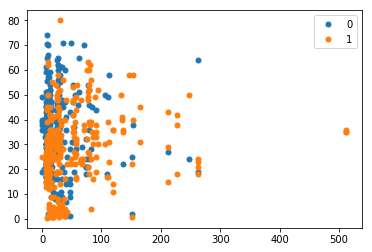

d(Clase 0):  5.56821658232254
d(Clase 1):  5.4863903748502745
Pasaje:  100 	Edad:  55
Murió.



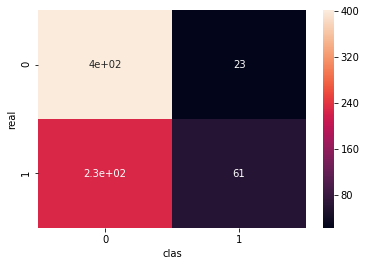

In [130]:
#Funcion determinante lineal que reciba un archivo csv, una edad y un costo para predecir si vive o muere.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

def openCSV(file, col = []):
    try:
        fDf = pd.read_csv(file, delimiter=",")
    
    except FileNotFoundError:
            print("Nombre de archivo incorrecto.")

    if col != []:
        fDf = fDf[col]
    
    return fDf
    
    
    #Clasificador
def DoAClass(df, fare, age, show = False):
    
    #Vivo o muerto
    DoA = -1
    
    #vector (fare,age)
    x = np.array([fare,age])

    #Se separan las clases
    tClass0 = df[df["Survived"] == 0]
    tClass1 = df[df["Survived"] == 1]

    #Promedios por clase
    pK0 = tClass0.shape[0]/df.shape[0]
    pK1 = tClass1.shape[0]/df.shape[0]
    
    #Matriz común de covarianza
    covT = np.cov(df[["Fare","Age"]],rowvar = False)
    
    #Medias
    meanFare0 = tClass0[["Fare"]].mean()
    meanAge0 = tClass0[["Age"]].mean()
    
    meanFare1 = tClass1[["Fare"]].mean()
    meanAge1 = tClass1[["Age"]].mean()
    
    #Vectores promedio 
    meanV0 = np.array([meanFare0,meanAge0])
    meanV1 = np.array([meanFare1,meanAge1])

    #Función lineal discriminante para x entregado
    D0 = -0.5 * (np.transpose(meanV0).dot(np.linalg.inv(covT))).dot(meanV0)[0][0] + (np.transpose(x).dot(np.linalg.inv(covT))).dot(meanV0)[0] + np.log(pK0)
    D1 = -0.5 * (np.transpose(meanV1).dot(np.linalg.inv(covT))).dot(meanV1)[0][0] + (np.transpose(x).dot(np.linalg.inv(covT))).dot(meanV1)[0] + np.log(pK1)
    
    if D0 > D1:
        DoA = 0
    else: 
        DoA = 1
    
    if show:
        print("d(Clase 0): ", D0)
        print("d(Clase 1): ", D1)

        print("Pasaje: ",fare,"\tEdad: ",age)
    if DoA:
        if show:
            print (print("VIVEN!\n"))
        return DoA
    else:
        if show:
            print("Murió.\n")
        return DoA


    #Gráfico
def GrafClass(df):

    groups = df.groupby('Survived')
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group.Fare, group.Age, marker = 'o', linestyle = '', ms = 5, label = name)
    ax.legend()
    plt.show()


def matriz_confusion(df):
    
    real = []
    clasificador = []
    
    for p in df.iterrows():
        real.append(int(p[1][0]))
        clasificador.append(DoAClass(df,p[1][1],p[1][2]))

    CM = pd.crosstab([real], [clasificador], rownames = ["real"], colnames = ["clasificador"])
    return CM

    
T = openCSV('titanic.csv',["Survived","Fare","Age"])

#Se consideran solo datos con edades válidas
T = T[T.Age >= 0]

#T = T.sample(n = 20) #muestra
GrafClass(T)
DoAClass(T,200,55,True)

sn.heatmap(matriz_confusion(T),annot = True)

## 2. Teorema de la Función Inversa (10p)

El teorema de la función inversa permite generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$. Donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$. 

En esta sección se trabajará con la distribución Weibull, cuya función de densidad de probabilidad está dada por:

\begin{aligned}
Weibull(\alpha,\beta) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}
\end{aligned}

Para trabajar el teorema de la función inversa siga los siguientes pasos:

1. Identificar la función que defina a la variable aleatoria.
2. De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).
3. De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$
4. Generar 10000 valores que siguen la distribución $u \sim U(0,1)$ y utilícelos como argumento en la función inversa encontrada
5. Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores. 
6. Concluya respecto a lo que observa en ambas gráficas.

## 3. Teorema del Límite Central (30p)

El teorema del límite central es uno de los postulados más importantes de estadística. En esta sección se procederá a comprobarlo en su forma clásica. 

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección se trabajará con la siguiente distribución y se demostrará lo que enuncia el TLC.

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

>a) Determine el valor esperado y la varianza **TEÓRICOS**

>b) Con $P = 10,1000$ calcule la media de muestras de tamaño : $n \in[2,10,30,100,1000]$ compare los resultados obtenidos para los dos $P$ dados. Presente los datos en una tabla ordenada con columnas: $n,\;P=10,\;P=1000$ Comente, ¿qué parece influir mas, la cantidad de repeticiones, el tamaño de la muestra o ambas?

>c) Con lo obtenido en b) haga un histograma para las muestras de tamaño 2, 30 y 1000 de P = 1000. Comente lo que observa y concluya. ¿Se cumple lo que enuncia el teorema del límite central?

## 4. Ley de los Grande Números (20p)

En estadística, la ley de los grandes números engloba teoremas que describen el comportamiento del promedio de una distribución de variables aleatorias. La ley de los grandes números dice que, en pocas palabras, a medida que se aumenta el tamaño muestral el promedio de la distribución de variables aleatorias converge al promedio de la población completa.

Un estudio realizado en el casino de la universidad MSU, indica que el tiempo de espera en la cola del casino para obtener su almuerzo puede modelarse como una distribución Exponencial con parámetro: $\lambda = 0.1$

>a) **Utilizando las funciones provistas por los lenguajes** calcule la probabilida **teórica** de que un alumno espere menos de 10 minutos, exactamente 20 minutos y más de 50 minutos.

>b) Ahora genere 3 muestras de dicha distribución exponencial, con tamaños n = 5, 100, 300, 10000. Para cada una de estas muestras determine las mismas probabilidades calculadas en a) de manera empírica, comente sus resultados.

>c) ¿Cuál debería ser la media **teórica** de todas estas distribuciones? ¿Y cuál es la empírica? ¿Si difieren o son iguales a qué se debe esto?

>d) Genere **un** gráfico de 4 boxplot (1 de cada distribución) y compárelos. Comente lo que observa y concluya respecto a la ley de los grandes números.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día *anunciado post_paro*
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Meme 

Si se dividen el trabajo del lab, que no quede así:

<img src="img/trabajo.png">

